# Homework #3

## Due Date: Tuesday, January 7, 23:59

### Part 1: Neuronal Spike Train Analysis Using Poisson Processes

   A neuroscientist is studying the firing patterns of a certain type of neuron in the brain. The average firing rate of these neurons is found to be 5 spikes per second. Assuming that the spike train of these neurons can be modeled as a Poisson process:

   a) What is the probability that the neuron fires exactly 10 times in a 2-second interval?

   b) Calculate the probability that the neuron fires at least once within a 0.1-second interval.

   c) What is the expected value of spikes for a 2 second interval?

### a)
expected number of spikes for 2 second interval with average firing rate of 5 spikes/sec: $ \lambda_{t=2} = 5 \cdot 2 = 10 $
$$ P(k = 10) = \frac{\lambda^k e^{- \lambda}}{k!} = \frac{10^{10} e^{-10}}{10!} \approx 0.125 $$

### b)
expected number of spikes for 0.1 second interval with average firing rate of 5 spikes/sec: $ \lambda_{t=0.1} = 5 \cdot 0.1 = 0.5 $ <br><br>
$$ P(k \ge 1) = 1 - P(k = 0) = 1 - \frac{0.5^{0} e^{-0.5}}{0!} = 1 - \frac{1 e^{-0.5}}{1} = 1- e^{-0.5} \approx 0.393 $$


### c)
for a 2 second interval the expected value of spikes would be $\lambda_{t=2} = 5 \cdot 2 = 10 $

### Part 2: Programming a Poisson Process

#### Notes:

- For all programming tasks, ensure that your code is well-commented to explain your logic and approach.
- Make sure to handle edge cases, such as negative values of $\lambda$ or $k$, appropriately in your functions.
- In Question 2, if you're unfamiliar with plotting libraries, focus on generating the probabilities and understanding the distribution's shape through the output values before attempting to plot.

#### Question 1: Implementing the Poisson Distribution

**Objective**: Write a program to manually calculate the probability of observing a given number of events $k$ in a fixed interval, given the average rate of occurrences $\lambda$, using the Poisson formula. You are not allowed to use any external libraries that directly compute Poisson probabilities.

**Instructions**:
1. Your program should define a function `poisson_probability(lambda, k)` that takes the average rate $\lambda$ and the desired number of occurrences $k$ as inputs.
2. The function should use the Poisson formula:
   $
   P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
   $
3. Calculate $k!$ (factorial of $k$) using a loop or recursive function.
4. Return the probability of observing exactly $k$ events.
5. Test your function by calculating the probability of observing 3 events for $\lambda = 2.5$.

In [ ]:
import math

#  manually calculate factorial using a loop

def factorial(k):

    """
    Parameters:
    k (int) the number of which we need to calculate factorial

    Returns:
    result of the factorial calculation
    """
    result = 1

    # edge case for negative k
    if k < 0:
      return "k must be a non-negative value"

    # edge case for 0 or 1
    elif k == 0 or k == 1:
      return result

    else:
      for i in range(2, k + 1):
        result *= i

    return result


# function to calculate Poisson probability
# using lambda_ as variable name because lambda is a reserved word in python

def poisson_probability(lambda_, k):
    """
    Parameters:
    lambda  (float): The rate parameter of the Poisson distribution, represents the average number of events in a fixed interval. Must be non-negative.
    k (int): The number of events for which to calculate the probability. Must be a positive integer.

    Returns:
    poisson probability of observing k values with lambda rate parameter
    """
    # edge case for negative lambda or k
    if lambda_ < 0 or k < 0:
        return "λ and k must be non-negative values."

    k_fact = factorial(k)
    exp_term = math.exp(-lambda_)

    # Poisson probability
    probability = (lambda_ ** k) * exp_term / k_fact

    return probability

# calculating the probability of observing 3 events for lambda = 2.5
lambda_value = 2.5
k_value = 3
result = poisson_probability(lambda_value, k_value)
print(f"The probability of observing {k_value} events with λ = {lambda_value} is: {result}")


The probability of observing 3 events with λ = 2.5 is: 0.21376301724973645


### Question 2: Drawing a Poisson Distribution

**Objective**: Create a function to simulate and plot the Poisson distribution for a given $\lambda$ over a range of $k$ values (e.g., from 0 to 20). You may use basic plotting libraries (like matplotlib in Python) but should calculate the Poisson probabilities manually using your function from Question 1.

**Instructions**:
1. Define a function `plot_poisson_distribution(lambda, k_range)` where `lambda` is the average rate of events, and `k_range` is the maximum value of $k$ you want to plot.
2. Use your `poisson_probability` function to compute the probabilities for each $k$ from 0 to `k_range`.
3. Store the probabilities in a list or array.
4. Plot $k$ on the x-axis and the corresponding probabilities on the y-axis. Make sure to label your axes appropriately.
5. Test your plotting function with $\lambda = 4$ and `k_range = 15`.

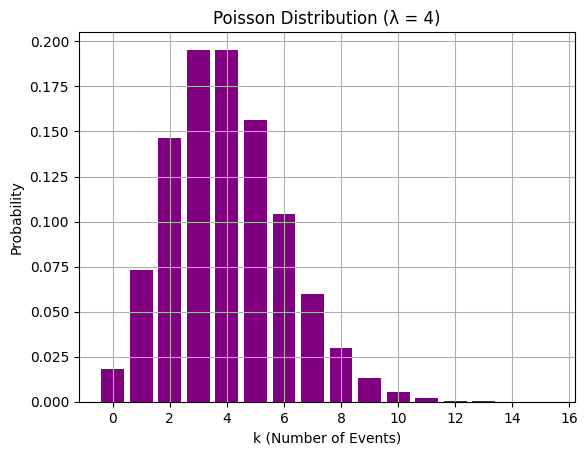

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp

# plotting Poisson Distribution
# again can't use lambda since it's a reserved word in python

def plot_poisson_distribution(lmbda, k_range):
    """
    Parameters:
    lmbda  (float): The rate parameter of the Poisson distribution, represents the average number of events in a fixed interval. Must be non-negative.
    k_range (int): The maximum number of events for which to calculate and plot the probabilities. Must be a positive integer.

    Raises ValueError If `lmbda` is negative, `k_range` is not a positive integer, or if `k_range` is not an integer.

    Returns:
    None. This function does not return any values. It generates and displays a plot of the Poisson distribution.

    """

    # edge case: k_range not an int
    if type(k_range) != int:
      raise ValueError("k must be an integer")

    # edge case: negative lambda
    if lmbda < 0:
        raise ValueError("λ (lambda) must be non-negative.")

    # edge case: negative or zero k_range
    if k_range <= 0:
        raise ValueError("k_range must be a positive integer.")

    # make sure k values start from 0
    k_values = np.arange(0, k_range + 1)
    probabilities = [poisson_probability(lmbda, k) for k in k_values]

    plt.bar(k_values, probabilities, color='purple')
    plt.title(f"Poisson Distribution (λ = {lmbda})")
    plt.xlabel('k (Number of Events)')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

# test the function with lambda = 4 and k_range = 15
plot_poisson_distribution(4, 15)

### Question 3: Calculating the Cumulative Probability

**Objective**: Write a program to calculate the cumulative probability of observing up to $n$ events for a given $\lambda$, without using any external cumulative distribution function.

**Instructions**:
1. Your program should define a function `cumulative_poisson_probability(lambda, n)` that computes the cumulative probability of observing up to $n$ events.
2. The function should sum the probabilities of observing 0 up to $n$ events, using your `poisson_probability` function from Question 1.
3. Return the cumulative probability.
4. Test your function by calculating the cumulative probability of observing up to 5 events for $\lambda = 3$.

In [ ]:
def cumulative_poisson_probability(lambda_, n):
    """
    Parameters:
    lambda_  (float): The rate parameter of the Poisson distribution, represents the average number of events in a fixed interval. Must be non-negative.
    n (int): The maximum number of events for which to calculate the cumulative probability. Must be a positive integer.

    Returns:
    poisson probability of observing k values with lambda rate parameter
    """
    # edge case for negative values
    if lambda_ < 0 or n < 0:
      raise ValueError("Both lambda and n must be non-negative values.")

    cumulative_prob = 0
    for k in range(n + 1):
        cumulative_prob += poisson_probability(lambda_, k)
    return cumulative_prob


# test the function with lambda = 3 and n = 5
lambda_ = 3
n = 5
result = cumulative_poisson_probability(lambda_, n)
print(f"The cumulative probability of observing up to {n} events for λ={lambda_} is {result:.4f}")


The cumulative probability of observing up to 5 events for λ=3 is 0.9161


### Question 4: Generating and Analyzing Spike Trains

**Objective**: Generate spike trains using a Poisson process and analyze their properties, incorporating a refractory period and exploring neuron burstiness and correlation.

**Instructions**:

#### 4.1: Generate a Poisson Spike Train
1. Use the Poisson process generator from last week to create a spike train.
2. Set the spike rate to $r_0 = 30$ spikes per second and simulate over 60 seconds.
3. Display the resulting spike train.

#### 4.2: Add a Refractory Period
1. Modify the Poisson process generator to include a refractory period parameter, set to 1 millisecond.
2. Simulate the refractory period as follows:
   - After each spike, set the firing rate to 0.
   - Allow the firing rate to recover linearly to $r_0$ with the recovery rate:
     $$
     r(t) = r_0\frac{t-t_{spike}}{5}
     $$
     where $t_{spike}$ is the time of the last spike, and both $t$ and $t_{spike}$ are in milliseconds.
   - Ensure $r(t)$ does not exceed the initial firing rate $r_0$.
3. Plot the resulting spike train overlaid with $r(t)$.

#### 4.3: Analyze the Spike Train
1. Generate the following plots for the spike train:
   - **1.3.1**: Time interval histogram (TIH).
   - **1.3.2**: Survivor function.
   - **1.3.3**: Hazard function.

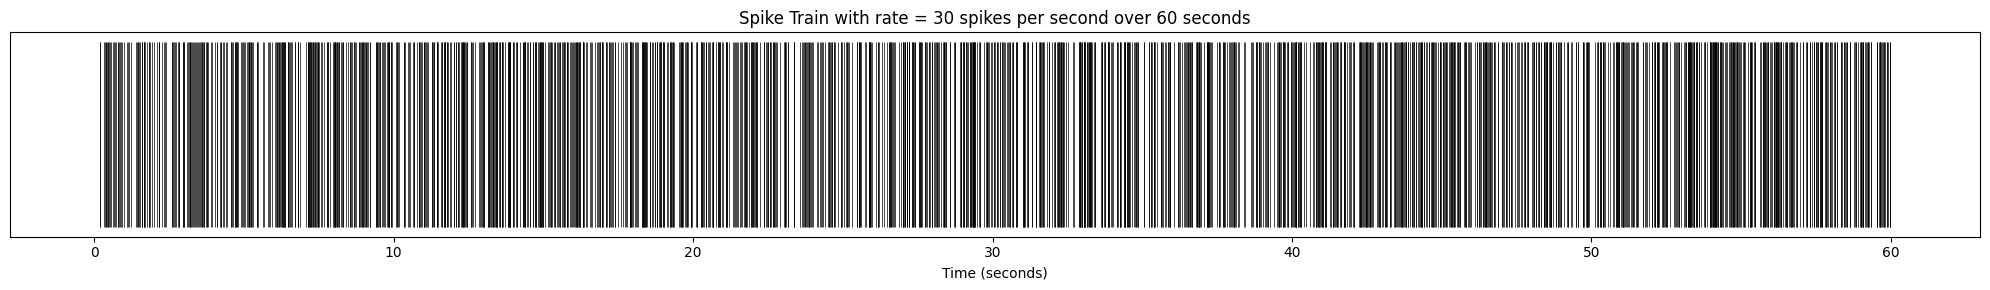

In [ ]:
### question 4.1 ###

import numpy as np
import matplotlib.pyplot as plt

# function to generate Poisson spike train

def generatePoiSpikes(r, dt, size):
    """
    Parameters:
    - r (float): The firing rate in Hz (spikes per second).
    - dt (float): The time step or bin size in seconds (e.g., 0.001 for 1 ms).
    - totalSize (float): The total duration of the spike train in seconds.

    Returns:
    - spikeTrain (np.ndarray): Binary array where 1 indicates a spike and 0 indicates no spike.
    """

    nbins = int(np.floor(size / dt))
    prob_of_spike = r * dt
    spikes = np.random.rand(nbins) < prob_of_spike
    return spikes


# Parameters
r0 = 30  # firing rate in spikes/second
dt = 0.001  # time step in seconds (1 ms)
totalSize = 60  # total duration in seconds

# generate spike train
spikeTrain = generatePoiSpikes(r0, dt, totalSize)

# time array for plotting
time = np.arange(0, totalSize, dt)

spike_times = time[spikeTrain]

# plot the spike train as vertical lines for each spike
plt.figure(figsize=(20, 3))
plt.vlines(time[spikeTrain == 1], ymin=0, ymax=1, color='black', linewidth=0.5)
plt.title(f"Spike Train with rate = {r0} spikes per second over {totalSize} seconds")
plt.xlabel('Time (seconds)')
plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()


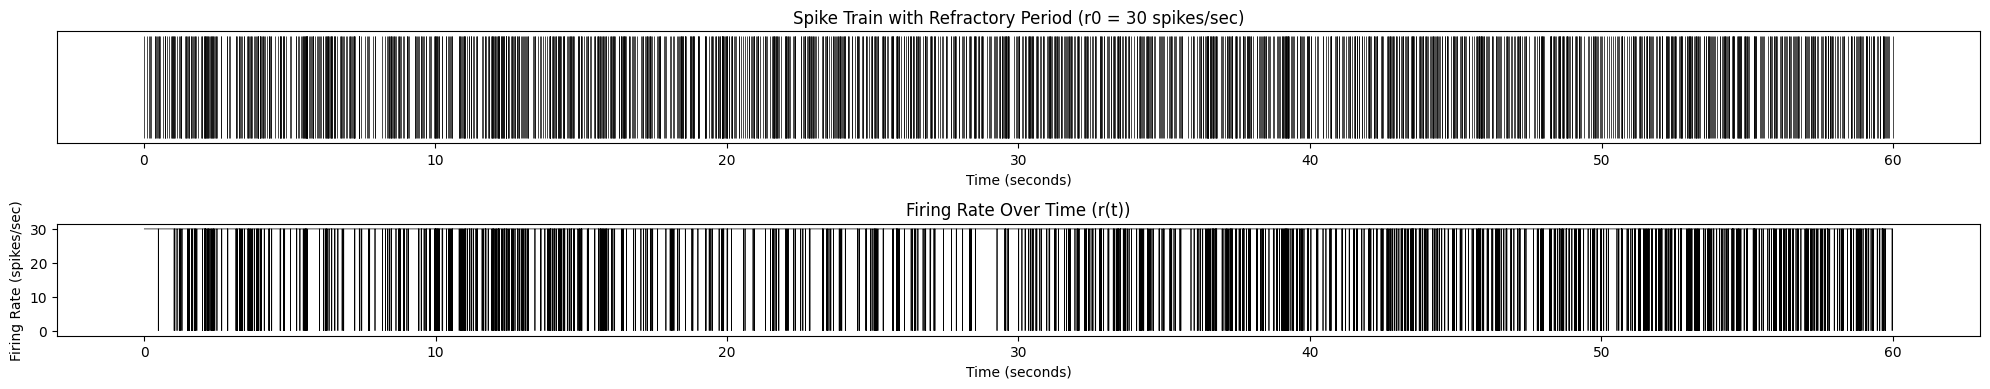

In [ ]:
### question 4.2 ###

import numpy as np
import matplotlib.pyplot as plt

# Function to generate Poisson spike train with refractory period (in seconds)
def generatePoiSpikesWithRefractory(r0, dt, size, refractory_period=0.001):
    """
    Parameters:
    - r0 (float): The firing rate in Hz (spikes per second).
    - dt (float): The time step or bin size in seconds (e.g., 0.001 for 1 ms).
    - size (float): The total duration of the spike train in seconds.
    - refractory_period (float): The refractory period after each spike in seconds (default 1 ms).

    Returns:
    - spikeTrain (np.ndarray): Binary array where 1 indicates a spike and 0 indicates no spike.
    - firingRate (np.ndarray): The firing rate `r(t)` at each time step.
    """
    num_bins = int(np.floor(size / dt))
    spikeTrain = np.zeros(num_bins, dtype=int)
    firingRate = np.zeros(num_bins)
    current_rate = r0

    # time of the last spike (initially set to -refractory_period)
    last_spike_time = -refractory_period  # seconds

    # generate spikes with refractory period and firing rate recovery
    for t in range(num_bins):
        time_sec = t * dt

        # in the refractory period, set the firing rate to 0
        if time_sec - last_spike_time < refractory_period:
            current_rate = 0
        else:
            # recovery function: gradual recovery to r0
            recovery_in_ms = (time_sec - last_spike_time) * 1000
            recovery_rate = r0 * recovery_in_ms / 5
            current_rate = min(r0, current_rate + recovery_rate)

        # probability of a spike based on the current firing rate
        spike_prob = current_rate * dt
        rand_val = np.random.rand()
        if rand_val < spike_prob:
            spikeTrain[t] = 1
            last_spike_time = time_sec

        firingRate[t] = current_rate

    return spikeTrain, firingRate


# Parameters
r0 = 30  # Firing rate in spikes per second
dt = 0.001  # Time step in seconds (1 ms)
totalSize = 60  # Total duration in seconds
refractory_period = 0.001  # Refractory period in seconds (1 ms)


spikeTrain, firingRate = generatePoiSpikesWithRefractory(r0, dt, totalSize, refractory_period)
time = np.arange(0, totalSize, dt)

# Plot the spike train and firing rate (r(t)) overlaid
plt.figure(figsize=(20, 4))

# Plot the spike train as vertical lines for each spike
plt.subplot(2, 1, 1)
plt.vlines(time[spikeTrain == 1], ymin=0, ymax=1, color='black', linewidth=0.5)
plt.title(f"Spike Train with Refractory Period (r0 = {r0} spikes/sec)")
plt.xlabel('Time (seconds)')
plt.ylabel('Spike')
plt.gca().axes.get_yaxis().set_visible(False)

# Plot the firing rate over time (r(t))
plt.subplot(2, 1, 2)
plt.plot(time, firingRate, color='black', lw=0.5)
plt.title("Firing Rate Over Time (r(t))")
plt.xlabel('Time (seconds)')
plt.ylabel('Firing Rate (spikes/sec)')

plt.tight_layout()
plt.show()


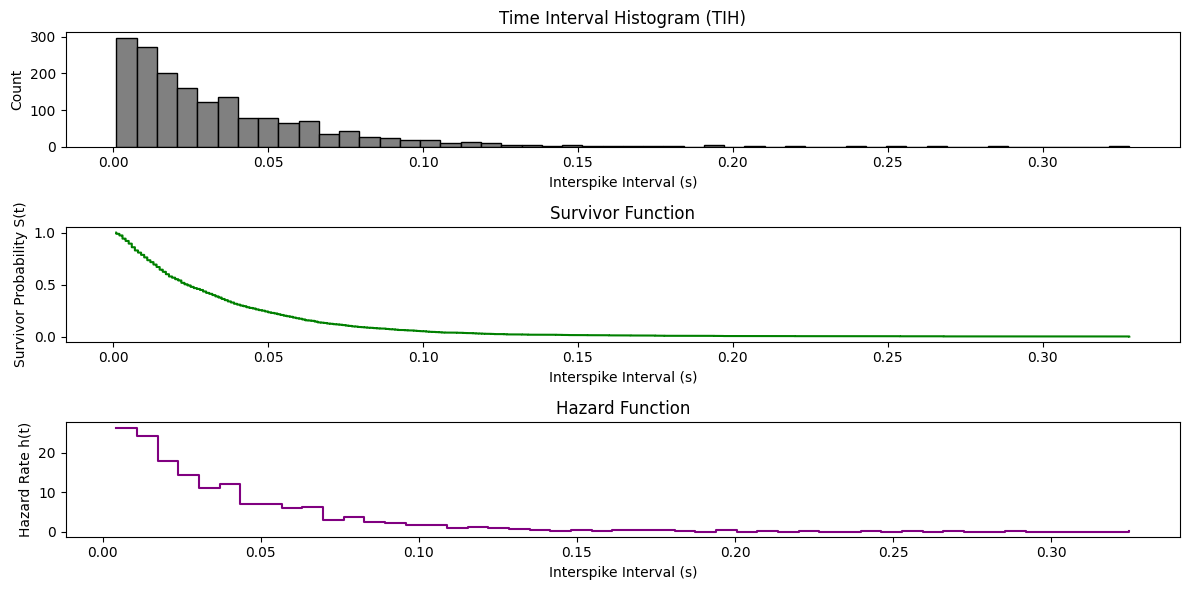

In [ ]:
### question 4.3 ###

import numpy as np
import matplotlib.pyplot as plt

# parameters for spike train simulation
r0 = 30  # firing rate in spikes per second
dt = 0.001  # time step in seconds (1 ms)
totalSize = 60  # total duration in seconds
refractory_period = 0.001  # refractory period in seconds (1 ms)

# generate the spike train and firing rate over time
spikeTrain, firingRate = generatePoiSpikesWithRefractory(r0, dt, totalSize, refractory_period)

time_axis = np.arange(0, totalSize, dt)
refractory_spike_times = time_axis[spikeTrain==1]


plt.figure(figsize=(12, 6))

# Compute interspike intervals
isis = np.diff(refractory_spike_times)

# Plot the histogram of interspike intervals
plt.subplot(3, 1, 1)
plt.hist(isis, bins=50, color='gray', edgecolor='black')
plt.title("Time Interval Histogram (TIH)")
plt.xlabel("Interspike Interval (s)")
plt.ylabel("Count")

# Survivor function: S(t) = P(ISI > t)
sorted_intervals = np.sort(isis)
survivor_function = 1.0 - np.arange(len(sorted_intervals)) / len(sorted_intervals)

# Plot the survivor function
plt.subplot(3, 1, 2)
plt.step(sorted_intervals, survivor_function, where='post', color='green')
plt.title("Survivor Function")
plt.xlabel("Interspike Interval (s)")
plt.ylabel("Survivor Probability S(t)")

# Hazard function: h(t) = f(t) / S(t)
# f(t) (Probability density) estimated from histogram
counts, bin_edges = np.histogram(isis, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
hazard_function = counts / survivor_function[:len(bin_centers)]

# Plot the hazard function
plt.subplot(3, 1, 3)
plt.step(bin_centers, hazard_function, where='post', color='purple')
plt.title("Hazard Function")
plt.xlabel("Interspike Interval (s)")
plt.ylabel("Hazard Rate h(t)")

plt.tight_layout()
plt.show()


### Question 5: Exploring Neuronal Burstiness and Correlation

**Objective**: Extend the spike generator to model bursty neurons and analyze correlations between oscillating neurons.

#### 5.1: Simulate Bursty Neuron Activity
1. Adapt the spike generator to model a **bursty** neuron.
2. Ensure the refractory period mechanism remains intact.
3. Plot the resulting spike train for the bursty neuron.

#### 5.2: Auto-Correlation of Spike Train
1. Refactor your homemade convolution function into a correlation function.
2. Auto-correlate the spike train with itself using this function.
3. Normalize the correlation by the amplitude of the center peak and interpret its meaning.

#### 5.3: Cross-Correlation of Two Oscillating Neurons
1. Generate two oscillating neurons by first defining their $r(t)$ and then randomizing the spike train accordingly.
2. Compute the cross-correlation of the two neurons using the correlation function.
3. Interpret the result:
   - Explain the time lag (x-axis) of the peaks.
   - Describe the amplitude (y-axis) of the peaks.

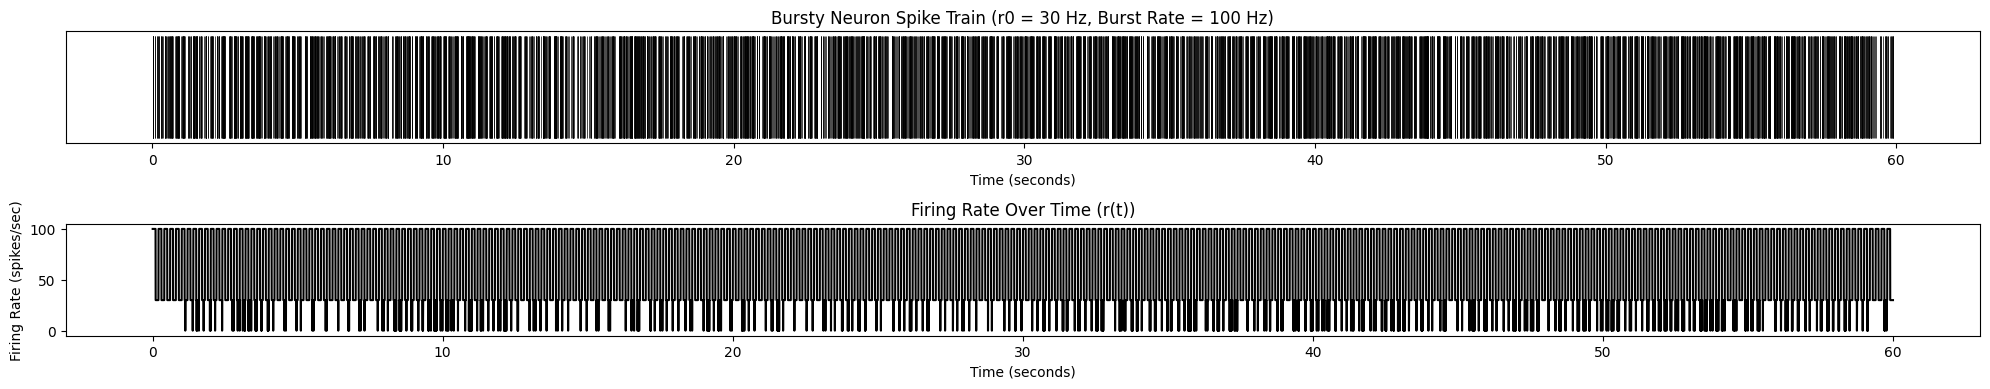

In [ ]:
### question 5.1 ###

import numpy as np
import matplotlib.pyplot as plt

# Function to generate Poisson spike train with refractory period and burstiness
def generate_bursty_spike_train(r0, dt, totalSize, refractory_period=0.001, burst_rate=100, burst_duration=0.1):
    """
    Parameters:
    - r0 (float): Baseline firing rate in Hz (spikes per second).
    - dt (float): Time step in seconds.
    - totalSize (float): Total duration of the spike train in seconds.
    - refractory_period (float): Refractory period in seconds.
    - burst_rate (float): Rate during burst periods (spikes per second).
    - burst_duration (float): Duration of each burst in seconds.

    Returns:
    - spikeTrain (np.ndarray): Binary array where 1 indicates a spike and 0 indicates no spike.
    - firingRate (np.ndarray): The firing rate `r(t)` at each time step.
    """
    num_bins = int(totalSize / dt)
    spikeTrain = np.zeros(num_bins, dtype=int)
    firingRate = np.zeros(num_bins)
    current_rate = r0
    last_spike_time = -refractory_period  # seconds, set to negative initially to allow first spike


    for t in range(num_bins):
        time_sec = t * dt
        burst = False

        # adjust the firing rate during burst periods
        if (time_sec // burst_duration) % 2 == 0:
            burst = True

        # apply refractory period
        if time_sec - last_spike_time < refractory_period:
            current_rate = 0
        else:
            # recovery function: gradual recovery to r0
            recovery_in_ms = (time_sec - last_spike_time) * 1000
            recovery_rate = r0 * recovery_in_ms / 5
            current_rate = min(r0, current_rate + recovery_rate)

        if burst:
            current_rate = burst_rate

        spike_prob = current_rate * dt
        rand_val = np.random.rand()

        # generate spike if the random number is less than the spike probability
        if rand_val < spike_prob:
            spikeTrain[t] = 1
            last_spike_time = time_sec

        # store the firing rate at each time step
        firingRate[t] = current_rate

    return spikeTrain, firingRate

# Parameters
r0 = 30  # firing rate in Hz
dt = 0.001  # time step (1 ms)
totalSize = 60  # total simulation time in seconds
refractory_period = 0.001  # refractory period (1 ms)
burst_rate = 100  # burst rate in Hz
burst_duration = 0.1  # burst duration in seconds

# generate bursty spike train
spikeTrain, firingRate = generate_bursty_spike_train(r0, dt, totalSize, refractory_period, burst_rate, burst_duration)

# plot bursty spike train and firing rate
time = np.arange(0, totalSize, dt)

plt.figure(figsize=(20, 4))

# plot spike train
plt.subplot(2, 1, 1)
plt.vlines(time[spikeTrain == 1], ymin=0, ymax=1, color='black', linewidth=0.5)
plt.title(f"Bursty Neuron Spike Train (r0 = {r0} Hz, Burst Rate = {burst_rate} Hz)")
plt.xlabel('Time (seconds)')
plt.ylabel('Spike')
plt.gca().axes.get_yaxis().set_visible(False)

# plot firing rate over time
plt.subplot(2, 1, 2)
plt.plot(time, firingRate, color='black', lw=1.5)
plt.title("Firing Rate Over Time (r(t))")
plt.xlabel('Time (seconds)')
plt.ylabel('Firing Rate (spikes/sec)')

plt.tight_layout()
plt.show()


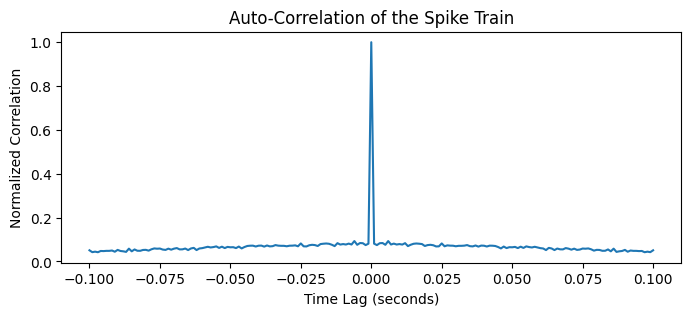

In [ ]:
### question 5.2 ###

import numpy as np
import matplotlib.pyplot as plt

# based on convolution function from last week

def manual_correlation(spike_train1, spike_train2, max_lag=0, normalize=True):
    """
    Parameters:
    spike_train1: array-like
        Binary spike train for the first neuron.
    spike_train2: array-like
        Binary spike train for the second neuron.
    max_lag: int
        Maximum lag (in bins) for which to compute the cross-correlation.

    Returns:
    cross_corr: array
        Cross-correlation values for lags from -max_lag to +max_lag.
    """
    # Convert spike trains to binary representation if needed
    spike_indices1 = np.where(spike_train1)[0]
    spike_indices2 = np.where(spike_train2)[0]

    corr = np.zeros(2 * max_lag + 1)

    for lag in range(-max_lag, max_lag + 1):
        shifted_indices2 = spike_indices2 + lag
        valid_indices = (shifted_indices2 >= 0) & (shifted_indices2 < len(spike_train1))

        # Compute correlation for valid overlaps
        corr[lag + max_lag] = np.sum(spike_train1[shifted_indices2[valid_indices]])

    if normalize:
        corr = corr / np.max(corr)

    return corr


r0 = 30  # Hz
dt = 0.001  # 1 ms
totalSize = 60  # 60 seconds
refractory_period = 0.001  # 1 ms
burst_rate = 100  # Hz
burst_duration = 0.1  # seconds
max_lag = int(0.1 / dt) # Max lag of 100 ms

# generate the spike train
spikeTrain, firingRate = generate_bursty_spike_train(r0, dt, totalSize, refractory_period, burst_rate, burst_duration)

# compute the auto-correlation
auto_correlation = manual_correlation(spikeTrain, spikeTrain, max_lag)

lags = np.arange(-max_lag, max_lag + 1) * dt

# plotting was not required but i still did to check myself
plt.figure(figsize=(8, 3))
plt.plot(lags, auto_correlation)
plt.title('Auto-Correlation of the Spike Train')
plt.xlabel('Time Lag (seconds)')
plt.ylabel('Normalized Correlation')
plt.show()


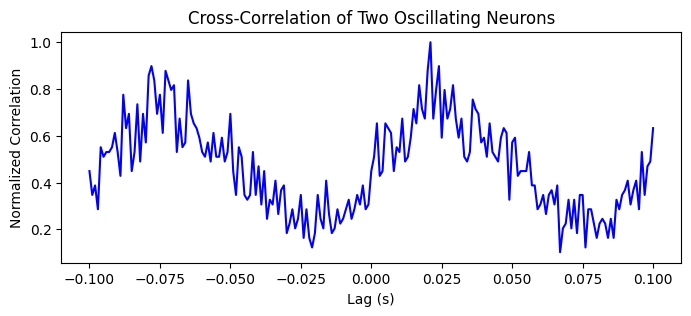

In [ ]:
### question 5.3 ###

# adapted function for oscillatory neurons
def generate_oscillating_neuron(dt, totalSize, rate, freq, phase=0):
    """
    Parameters:
    dt : float
        Time step (seconds).
    totalSize : float
        Total simulation time (seconds).
    rate : float
        Base firing rate (Hz).
    freq : float, optional
        Oscillation frequency (Hz).
    phase : float, optional
        Phase shift for oscillation (radians). Default is 0.

    Returns:
    spikes : array-like
        Binary spike train for the neuron.
    """

    time_axis = np.arange(0, totalSize, dt)

    # Oscillatory neuron: Sinusoidal firing rate
    rt = rate * (1 + np.sin(2 * np.pi * freq * time_axis + phase))

    # Convert firing rate to spike probabilities per time step
    spike_prob = rt * dt

    # Generate spikes
    spikes = (np.random.rand(len(time_axis)) < spike_prob).astype(int)

    return spikes


# Parameters for oscillating neurons
oscillation_freq = 10  # Hz
r0 = 20  # spikes per second


osc1 = generate_oscillating_neuron(dt, totalSize, r0, oscillation_freq)
osc2 = generate_oscillating_neuron(dt, totalSize, r0, oscillation_freq, np.pi/2)

cross_corr = manual_correlation(osc1, osc2, max_lag)
lags = np.arange(-max_lag, max_lag + 1) * dt

# Plot cross-correlation
plt.figure(figsize=(8, 3))
plt.plot(lags, cross_corr, color='blue')
plt.title("Cross-Correlation of Two Oscillating Neurons")
plt.xlabel("Lag (s)")
plt.ylabel("Normalized Correlation")
plt.show()